In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv("dataset.csv")
X = df.loc[:, df.columns != 'TOTEXPPQ']
X['INCOME'] = np.log(X['INCOME'] + 1)
y = np.log(df.TOTEXPPQ + 1)
# y = df.TOTEXPPQ

C:\Users\wayne\AppData\Local\Temp\ipykernel_33068\3185900934.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['INCOME'] = np.log(X['INCOME'] + 1)


In [2]:
def cal_scores(pred,act):
    mae = np.mean(np.abs(pred - act.values))
    mse = np.mean((pred - act.values)**2)
    rmse = np.sqrt(np.mean((pred - act.values)**2))
    print("MSE: " + str(mse))
    print("MAE: " + str(mae))
    print("RMSE: " + str(rmse))

In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components=30)
Xp = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Xp, y, test_size = 0.2, random_state = 31)

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm

grid = {'n_estimators':range(10,501,10)}
regr = GridSearchCV(estimator = RandomForestRegressor(n_jobs=-1, oob_score=True, random_state=0), 
                    param_grid = grid, scoring='r2',cv=3)
regr.fit(X_train, y_train)
print(regr.score(X_train, y_train),regr.score(X_test, y_test))

C:\Users\wayne\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\wayne\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\wayne\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\wayne\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\wayne\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probab

0.9082247181793741 0.4968201596969656


In [37]:
cal_scores(regr.predict(X_test),y_test)

MSE: 0.2736219422429107
MAE: 0.40106364310263876
RMSE: 0.523088847370034


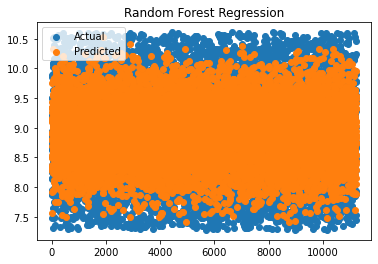

In [36]:
y_pred_regr = regr.predict(X_test)
plt.scatter(np.arange(len(X_test)),y_test,label = 'Actual')
plt.scatter(np.arange(len(X_test)),y_pred_regr,label = 'Predicted')
plt.title('Random Forest Regression')
plt.legend()

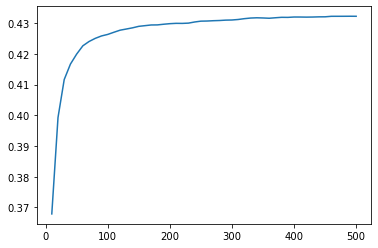

In [43]:
x = [i for i in range(10,501,10)]
plt.plot(x,regr.cv_results_['mean_test_score'])